# Projekat 1 - nadgledano učenje

# Preprocesiranje

### Importovanje biblioteka

In [3]:
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
import numpy as np
import math
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, r2_score, mean_absolute_error, mean_squared_error
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.dummy import DummyRegressor
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
import shap
%matplotlib inline

### Učitavanje podataka

In [4]:
df=pd.read_csv("spg.csv")

### Dimenzije dataset-a

In [5]:
df.shape

(4213, 21)

### Prikaz prvih 5 redova

In [6]:
df.head()

,temperature_2_m_above_gnd,relative_humidity_2_m_above_gnd,mean_sea_level_pressure_MSL,total_precipitation_sfc,snowfall_amount_sfc,total_cloud_cover_sfc,high_cloud_cover_high_cld_lay,medium_cloud_cover_mid_cld_lay,low_cloud_cover_low_cld_lay,shortwave_radiation_backwards_sfc,...,wind_direction_10_m_above_gnd,wind_speed_80_m_above_gnd,wind_direction_80_m_above_gnd,wind_speed_900_mb,wind_direction_900_mb,wind_gust_10_m_above_gnd,angle_of_incidence,zenith,azimuth,generated_power_kw
0,2.17,31,1035.0,0.0,0.0,0.0,0,0,0,0.00,...,312.71,9.36,22.62,6.62,337.62,24.48,58.753108,83.237322,128.33543,454.10095
1,2.31,27,1035.1,0.0,0.0,0.0,0,0,0,1.78,...,294.78,5.99,32.74,4.61,321.34,21.96,45.408585,75.143041,139.65530,1411.99940
2,3.65,33,1035.4,0.0,0.0,0.0,0,0,0,108.58,...,270.00,3.89,56.31,3.76,286.70,14.04,32.848282,68.820648,152.53769,2214.84930
3,5.82,30,1035.4,0.0,0.0,0.0,0,0,0,258.10,...,323.13,3.55,23.96,3.08,339.44,19.80,22.699288,64.883536,166.90159,2527.60920
4,7.73,27,1034.4,0.0,0.0,0.0,0,0,0,375.58,...,10.01,6.76,25.20,6.62,22.38,16.56,19.199908,63.795208,182.13526,2640.20340


### Prikaz zadnjih 5 redova

In [7]:
df.tail()

,temperature_2_m_above_gnd,relative_humidity_2_m_above_gnd,mean_sea_level_pressure_MSL,total_precipitation_sfc,snowfall_amount_sfc,total_cloud_cover_sfc,high_cloud_cover_high_cld_lay,medium_cloud_cover_mid_cld_lay,low_cloud_cover_low_cld_lay,shortwave_radiation_backwards_sfc,...,wind_direction_10_m_above_gnd,wind_speed_80_m_above_gnd,wind_direction_80_m_above_gnd,wind_speed_900_mb,wind_direction_900_mb,wind_gust_10_m_above_gnd,angle_of_incidence,zenith,azimuth,generated_power_kw
4208,8.69,66,1025.1,0.0,0.0,100.0,100,100,100,257.21,...,285.42,25.50,283.06,24.01,282.99,25.20,22.700907,64.952098,167.06794,173.410560
4209,7.57,90,1026.1,0.0,0.0,100.0,79,100,100,210.04,...,6.91,13.00,4.76,11.61,7.13,10.44,19.307487,63.895118,182.28247,403.792220
4210,7.27,90,1026.3,0.1,0.0,100.0,73,100,100,113.92,...,2.29,8.71,352.87,7.95,354.81,22.32,25.249506,65.827032,197.33868,158.367780
4211,8.25,81,1025.5,0.0,0.0,100.0,74,66,100,186.90,...,11.31,6.29,13.24,5.94,14.04,15.48,36.361161,70.496313,211.30027,126.953060
4212,8.00,80,1025.3,0.0,0.0,100.0,100,100,100,172.66,...,12.72,12.07,17.35,11.38,18.43,16.20,48.452849,76.919574,223.04931,20.055031


### Opis atributa dataset-a

temperature_2_m_above_gnd = Temperatura vazduha izmerena na visini od 2m iznad zemlje ($^{\circ}C$) <br>
relative_humidity_2_m_above_gnd = Relativna vlažnost vazduha izmerena na visini od 2m iznad zemlje ($\%$) <br>
mean_sea_level_pressure_MSL = Srednji pritisak na nivou mora ($hPa$) <br>
total_precipitation_sfc = Ukupna količina padavina na površini ($mm$) <br>
snowfall_amount_sfc = Količina snega koja je pala na površini ($mm$) <br>
total_cloud_cover_sfc = Ukupni procenat pokrivenosti oblacima iznad površine ($\%$) <br>
high_cloud_cover_high_cld_lay = Pokrivenost visokim oblacima ($\%$) <br>
medium_cloud_cover_mid_cld_lay = Pokrivenost srednjim oblacima ($\%$) <br>
low_cloud_cover_low_cld_lay = Pokrivenost niskim oblacima ($\%$) <br>
shortwave_radiation_backwards_sfc = Količina kratkotalasnog zračenja koje se reflektuje od površine ($W/m^2$) <br>
wind_speed_10_m_above_gnd = Brzina vetra na visini od 10 metara iznad zemlje ($m/s$) <br>
wind_direction_10_m_above_gnd = Pravac vetra na visini od 10 metara iznad zemlje ($^{\circ}$) <br>
wind_speed_80_m_above_gnd = Brzina vetra na visini od 80 metara iznad zemlje ($m/s$) <br>
wind_direction_80_m_above_gnd= Pravac vetra na visini od 80 metara iznad zemlje ($^{\circ}$) <br>
wind_speed_900_mb = Brzina vetra na nivou pritiska od 900 mb ($m/s$) <br>
wind_direction_900_mb = Pravac vetra na nivou pritiska od 900 mb ($^{\circ}$) <br>
wind_gust_10_m_above_gnd = Najjači nalet vetra na visini od 10 metara iznad zemlje ($m/s$) <br>
angle_of_incidence = Ugao pod kojim sunčevi zraci padaju na površinu ($^{\circ}$) <br>
zenith = Ugao između sunca i vertikale ($^{\circ}$) <br>
azimuth = Pravac sunca u horizontalnoj ravni ($^{\circ}$) <br>

### Izlazni atribut
generated_power_kw = Količina generisane energije iz solarnih panela ($kW$)

### Prikaz tipova podataka

In [8]:
df.dtypes

temperature_2_m_above_gnd            float64
relative_humidity_2_m_above_gnd        int64
mean_sea_level_pressure_MSL          float64
total_precipitation_sfc              float64
snowfall_amount_sfc                  float64
total_cloud_cover_sfc                float64
high_cloud_cover_high_cld_lay          int64
medium_cloud_cover_mid_cld_lay         int64
low_cloud_cover_low_cld_lay            int64
shortwave_radiation_backwards_sfc    float64
wind_speed_10_m_above_gnd            float64
wind_direction_10_m_above_gnd        float64
wind_speed_80_m_above_gnd            float64
wind_direction_80_m_above_gnd        float64
wind_speed_900_mb                    float64
wind_direction_900_mb                float64
wind_gust_10_m_above_gnd             float64
angle_of_incidence                   float64
zenith                               float64
azimuth                              float64
generated_power_kw                   float64
dtype: object

### Prikaz informacija o podacima

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4213 entries, 0 to 4212
Data columns (total 21 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   temperature_2_m_above_gnd          4213 non-null   float64
 1   relative_humidity_2_m_above_gnd    4213 non-null   int64  
 2   mean_sea_level_pressure_MSL        4213 non-null   float64
 3   total_precipitation_sfc            4213 non-null   float64
 4   snowfall_amount_sfc                4213 non-null   float64
 5   total_cloud_cover_sfc              4213 non-null   float64
 6   high_cloud_cover_high_cld_lay      4213 non-null   int64  
 7   medium_cloud_cover_mid_cld_lay     4213 non-null   int64  
 8   low_cloud_cover_low_cld_lay        4213 non-null   int64  
 9   shortwave_radiation_backwards_sfc  4213 non-null   float64
 10  wind_speed_10_m_above_gnd          4213 non-null   float64
 11  wind_direction_10_m_above_gnd      4213 non-null   float

### Provera da li postoje nedostajuće vrednosti

In [10]:
df.isna().sum()

temperature_2_m_above_gnd            0
relative_humidity_2_m_above_gnd      0
mean_sea_level_pressure_MSL          0
total_precipitation_sfc              0
snowfall_amount_sfc                  0
total_cloud_cover_sfc                0
high_cloud_cover_high_cld_lay        0
medium_cloud_cover_mid_cld_lay       0
low_cloud_cover_low_cld_lay          0
shortwave_radiation_backwards_sfc    0
wind_speed_10_m_above_gnd            0
wind_direction_10_m_above_gnd        0
wind_speed_80_m_above_gnd            0
wind_direction_80_m_above_gnd        0
wind_speed_900_mb                    0
wind_direction_900_mb                0
wind_gust_10_m_above_gnd             0
angle_of_incidence                   0
zenith                               0
azimuth                              0
generated_power_kw                   0
dtype: int64

### Provera da li postoje duplikati

In [11]:
duplicates=df.duplicated()
duplicates

0       False
1       False
2       False
3       False
4       False
        ...  
4208    False
4209    False
4210    False
4211    False
4212    False
Length: 4213, dtype: bool

In [12]:
print(f"Broj duplikata je: {duplicates.sum()}")

Broj duplikata je: 0


### Statistički opis

In [13]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
temperature_2_m_above_gnd,4213.0,15.068111,8.853677,-5.350000,8.390000,14.750000,21.290000,34.90000
relative_humidity_2_m_above_gnd,4213.0,51.361025,23.525864,7.000000,32.000000,48.000000,70.000000,100.00000
mean_sea_level_pressure_MSL,4213.0,1019.337812,7.022867,997.500000,1014.500000,1018.100000,1023.600000,1046.80000
total_precipitation_sfc,4213.0,0.031759,0.170212,0.000000,0.000000,0.000000,0.000000,3.20000
snowfall_amount_sfc,4213.0,0.002808,0.038015,0.000000,0.000000,0.000000,0.000000,1.68000
total_cloud_cover_sfc,4213.0,34.056990,42.843638,0.000000,0.000000,8.700000,100.000000,100.00000
high_cloud_cover_high_cld_lay,4213.0,14.458818,30.711707,0.000000,0.000000,0.000000,9.000000,100.00000
medium_cloud_cover_mid_cld_lay,4213.0,20.023499,36.387948,0.000000,0.000000,0.000000,10.000000,100.00000
low_cloud_cover_low_cld_lay,4213.0,21.373368,38.013885,0.000000,0.000000,0.000000,10.000000,100.00000
shortwave_radiation_backwards_sfc,4213.0,387.759036,278.459293,0.000000,142.400000,381.810000,599.860000,952.30000


### Distribucija atributa

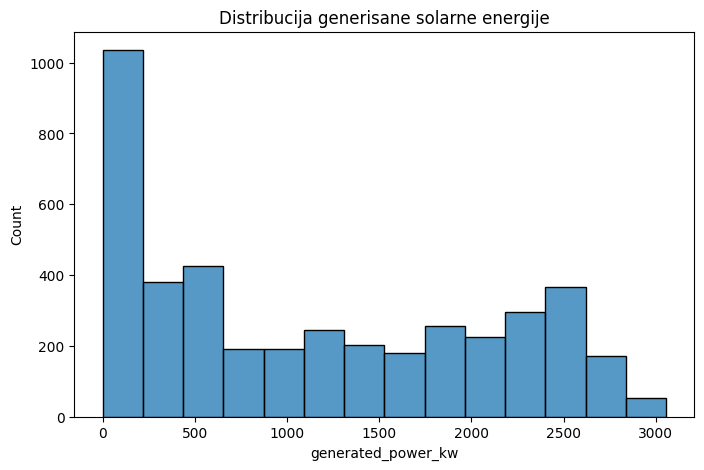

In [14]:
plt.figure(figsize=(8,5))
plt.title(f"Distribucija generisane solarne energije")
sns.histplot(df['generated_power_kw'])
plt.show()

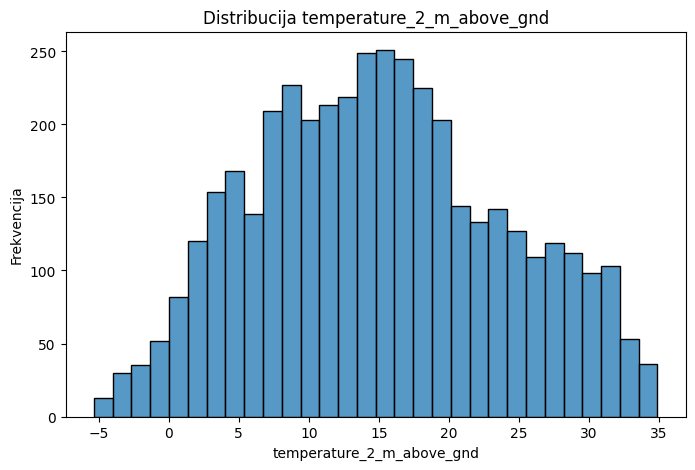

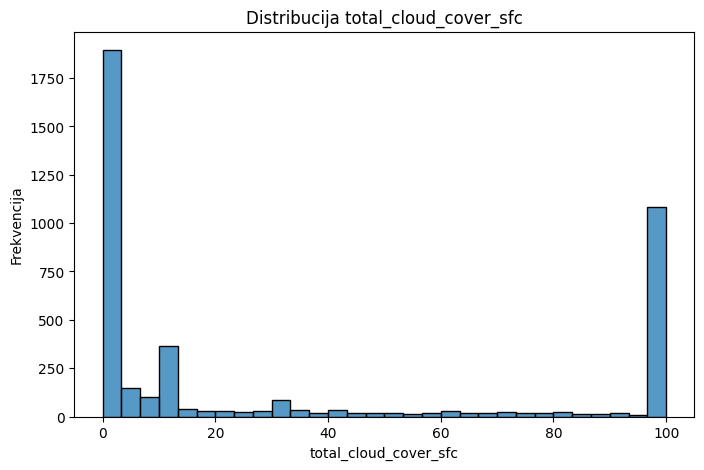

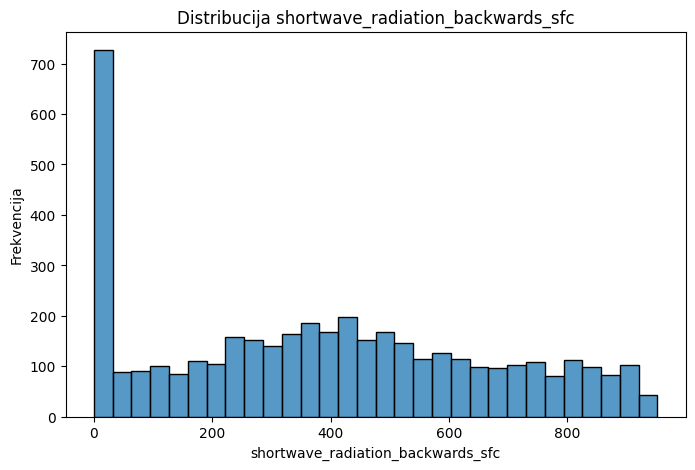

In [15]:
features = ['temperature_2_m_above_gnd', 'total_cloud_cover_sfc', 'shortwave_radiation_backwards_sfc']
for feature in features:
    plt.figure(figsize=(8, 5))
    sns.histplot(df[feature], bins=30)
    plt.title(f"Distribucija {feature}")
    plt.xlabel(feature)
    plt.ylabel("Frekvencija")
    plt.show()

### Boxplot

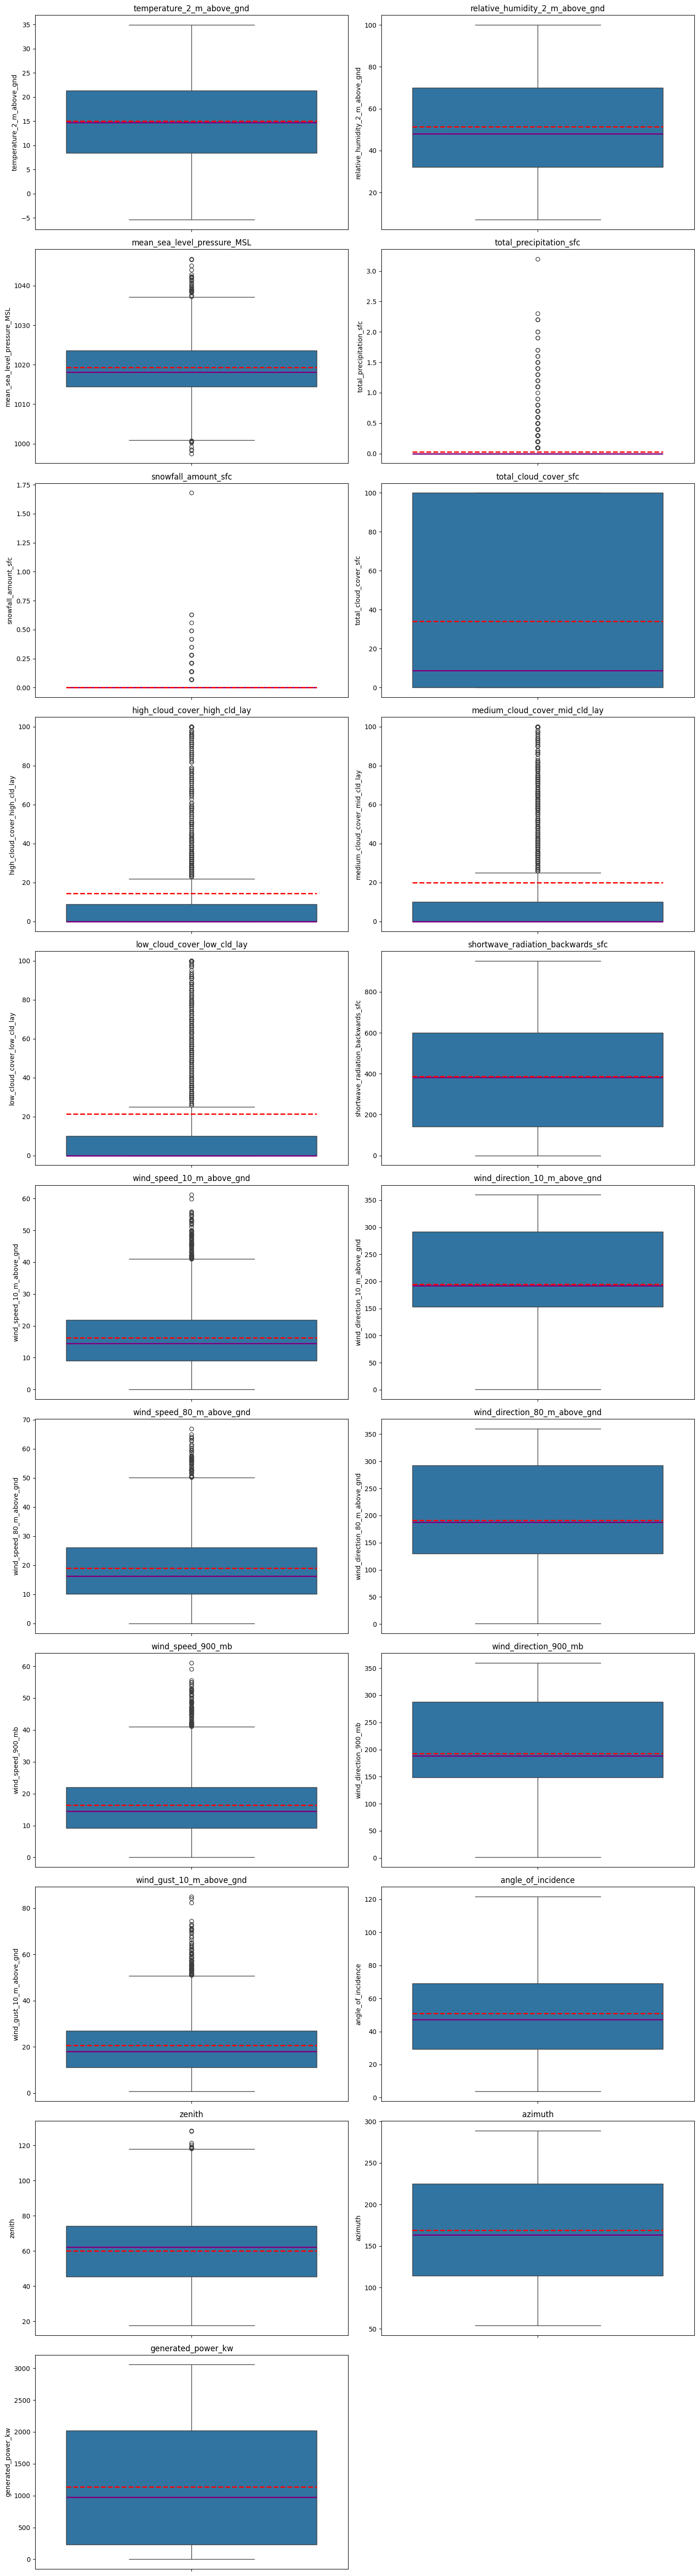

In [16]:
cols = 2 
rows = math.ceil(df.shape[1] / cols)

plt.figure(figsize=(15, 5 * rows))

for i, feature in enumerate(df.columns):
    plt.subplot(rows, cols, i + 1)
    sns.boxplot(
        y=df[feature], 
        showmeans=True, 
        meanline=True,
        meanprops={'color': 'red', 'linewidth': 2},
        medianprops={'color': 'purple', 'linewidth': 2}
    )
    plt.title(f"{feature}")
    plt.ylabel(feature)

plt.tight_layout()
plt.show()

### Violin plot

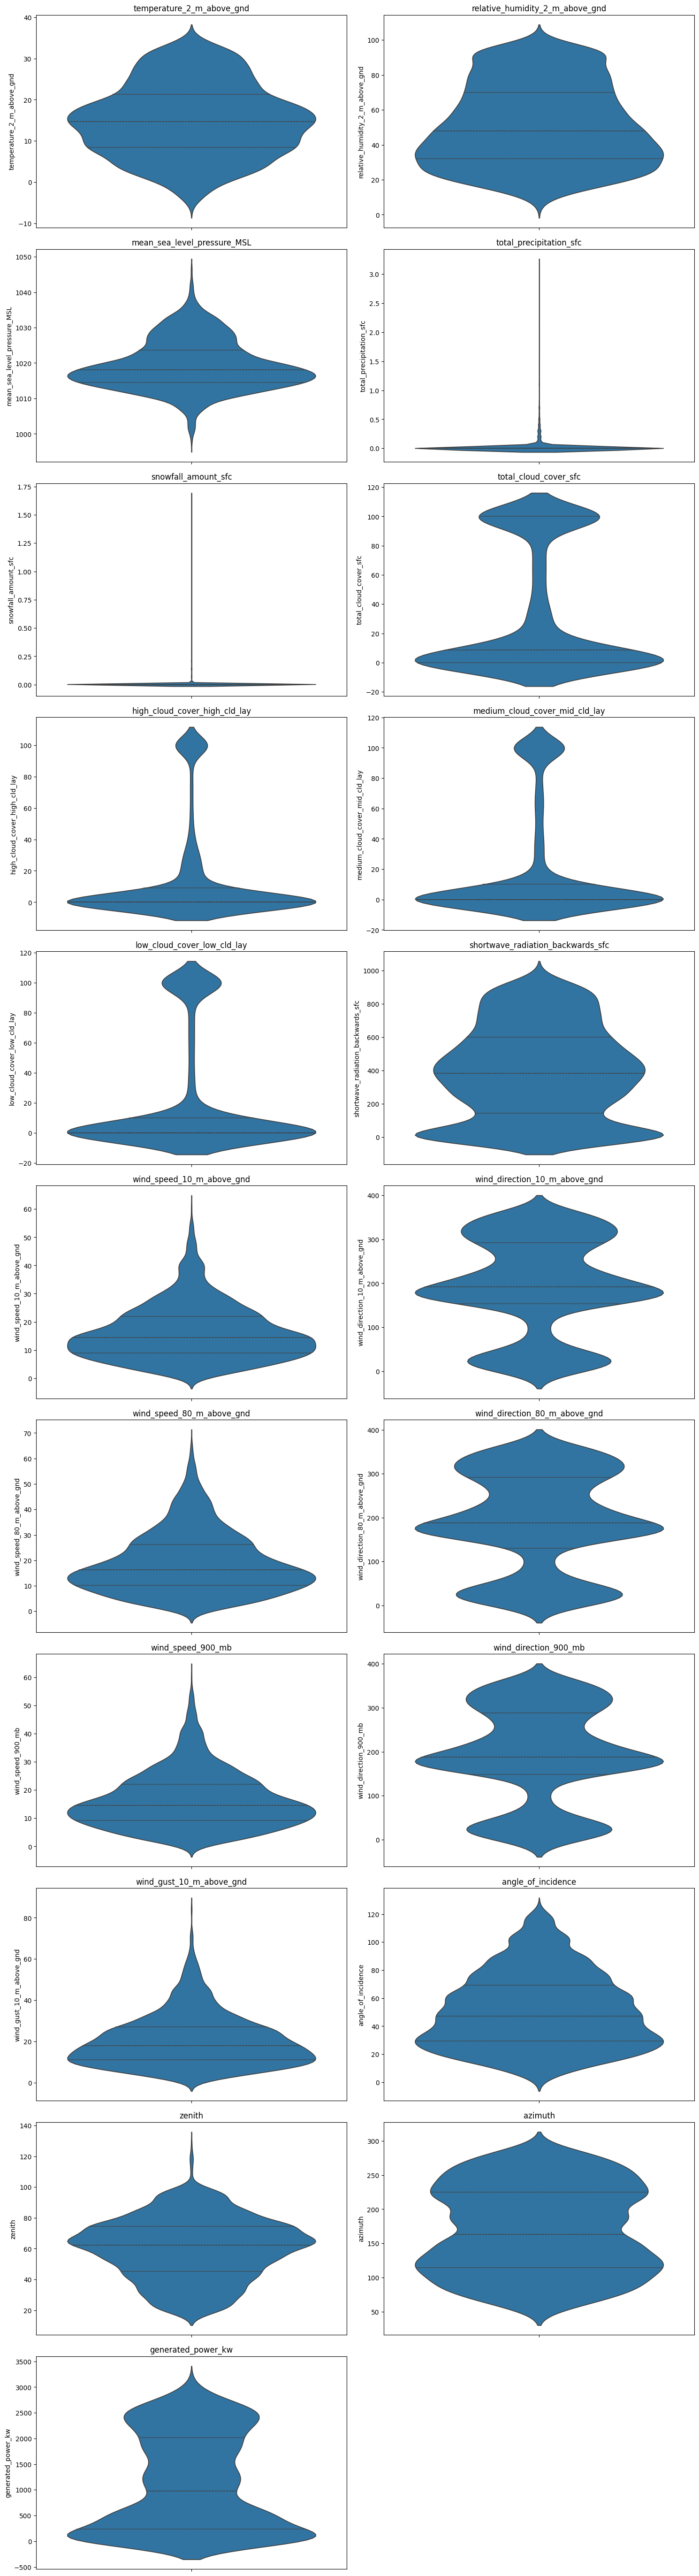

In [17]:
plt.figure(figsize=(15, 5 * rows))

for i, feature in enumerate(df.columns):
    plt.subplot(rows, cols, i + 1)
    
    sns.violinplot(
        y=df[feature],
        inner="quart"
    )
    
    plt.title(f"{feature}")
    plt.ylabel(feature)

plt.tight_layout()
plt.show()

### Scatter plot

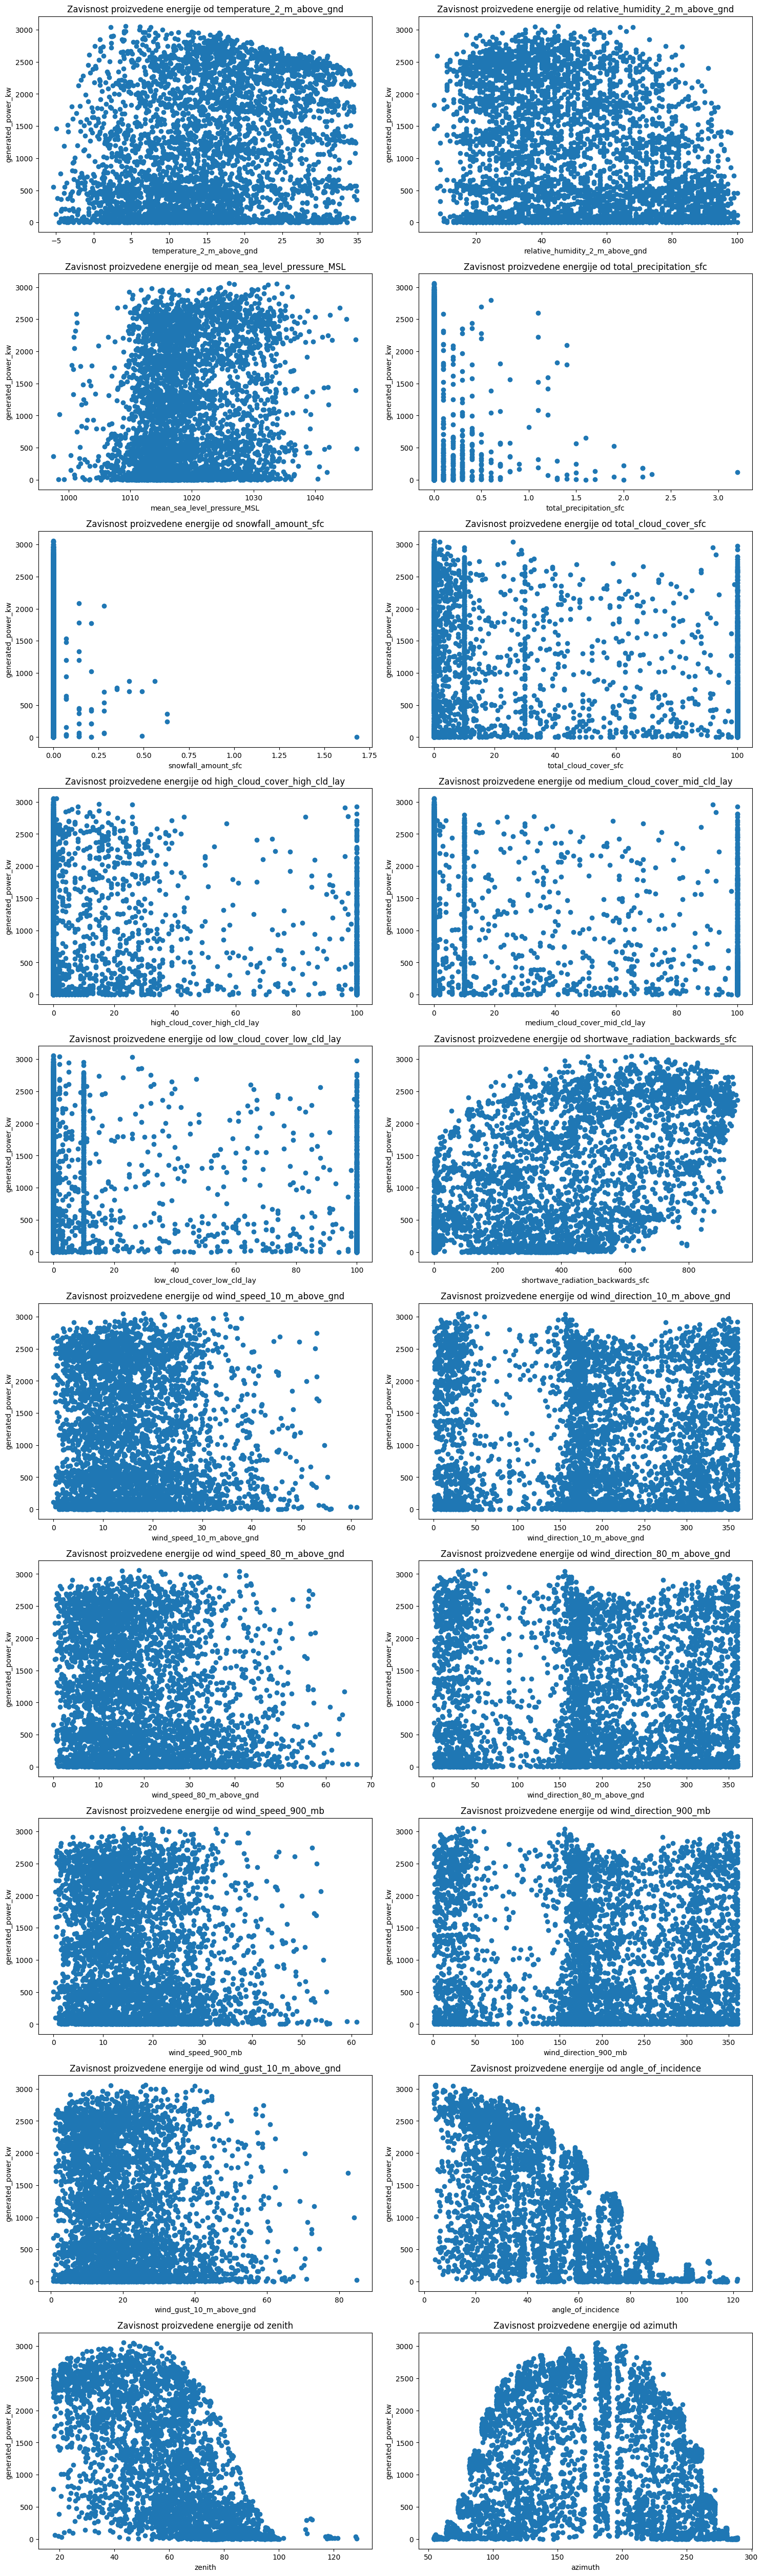

In [18]:
plt.figure(figsize=(15, 5 * rows))

input_columns = [col for col in df.columns if col != 'generated_power_kw']

for i, feature in enumerate(input_columns):
    plt.subplot(rows, cols, i + 1)

    x=df[feature]
    y=df['generated_power_kw']
    plt.scatter(x,y)
    
    plt.title(f"Zavisnost proizvedene energije od {feature}")
    plt.xlabel(feature)
    plt.ylabel('generated_power_kw')

plt.tight_layout()
plt.show()

**Zavisnost od temperature:** Većina podataka je ravnomerno raspoređena bez obzira na temperaturu i nema jasne zavisnosti između temperature i proizvedene solarne energije.

**Zavisnost od relativne vlažnosti:** Slično prethodnom grafikonu, ne primećuje se direktna zavisnost između relativne vlažnosti i proizvedene solarne energije.

**Zavisnost od pritiska na nivou mora:** Postoji gušća koncentracija podataka u srednjem opsegu pritiska (1005–1025 hPa).

**Zavisnost od padavina:** Najveća koncentracija proizvedene energije dolazi kada su padavine minimalne (blizu nule). Kako se povećava količina padavina, proizvodnja energije opada.

...

**Zavisnost od zenith:** Vidljivo je da kako zenith raste, proizvedena energija opada. Ovo je očekivano, jer veći ugao zenith (bliže horizontu) smanjuje količinu solarne energije koja dolazi direktno do panela. 

**Zavisnost od azimuth:** Zavisnost nije toliko očigledna kao kod zenith, ali deluje da se veća energija proizvodi kada je azimuth u određenim rasponima (oko 150-250 stepeni). Ovo može ukazivati na optimalnu orijentaciju panela prema suncu u toku dana.

### Matrica korelacije

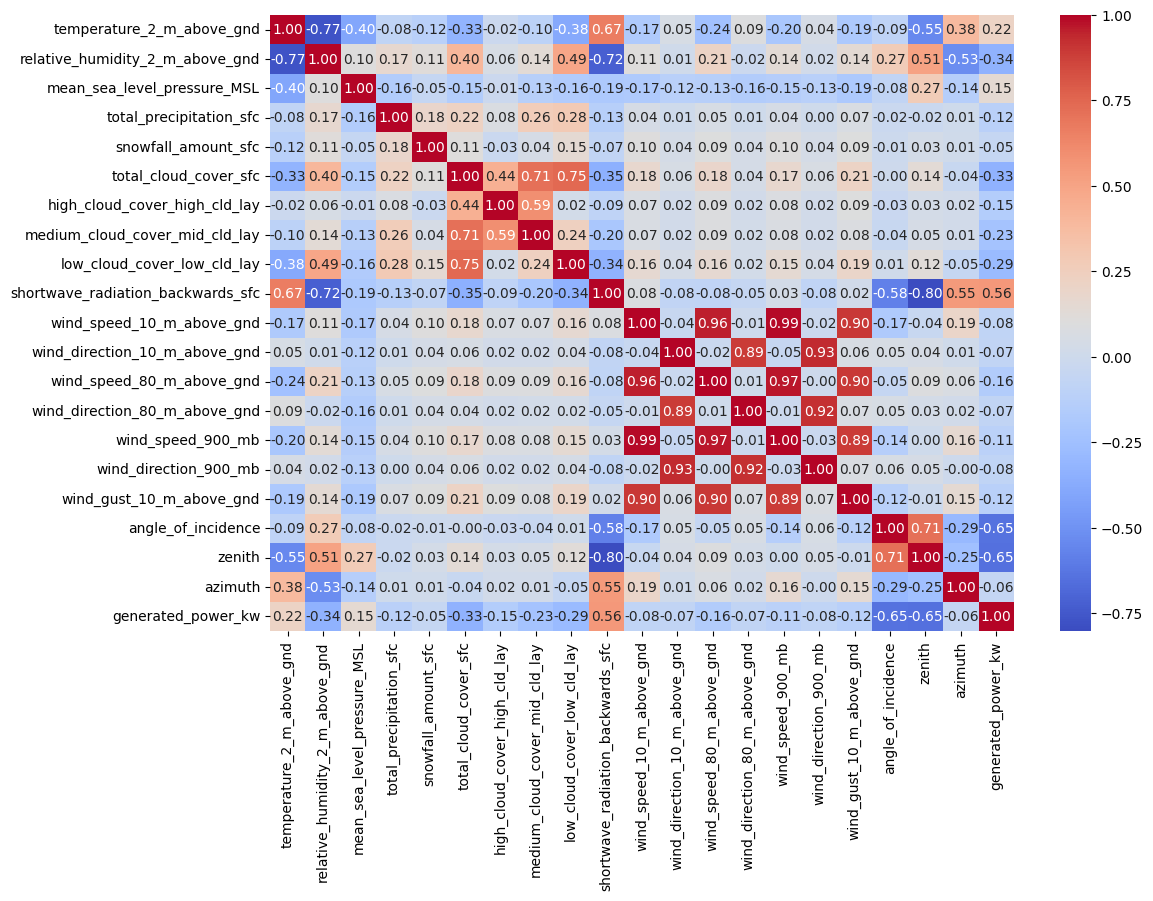

In [19]:
plt.figure(figsize=(12, 8))
df_corr=df.corr()
sns.heatmap(df_corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.show()

Može se primetiti visoka korelacija između sledećih atributa:
- **medium_cloud_cover_mid_cld_lay** i **total_cloud_cover_sfc**
- **low_cloud_cover_mid_cld_lay** i **total_cloud_cover_sfc**
- **wind_speed_80_m_above_gnd** i **wind_speed_10_m_above_gnd**
- **wind_speed_900_mb** i **wind_speed_10_m_above_gnd**
- **wind_gust_10_m_above_gnd** i **wind_speed_10_m_above_gnd**
- **wind_direction_80_m_above_gnd** i **wind_direction_10_m_above_gnd**
- **wind_direction_900_mb** i **wind_direction_10_m_above_gnd**
- **wind_speed_900_mb** i **wind_speed_80_m_above_gnd**
- **wind_gust_10_m_above_gnd** i **wind_speed_80_m_above_gnd**
- **wind_direction_900_mb** i **wind_direction_80_m_above_gnd**
- **wind_gust_10_m_above_gnd** i **wind_speed_900_mb**
- **zenith** i **angle_of_incidence**
  
Ovo ukazuje na to da postoji neka vrsta linearne povezanosti između ovih atributa, što se može iskoristiti za redukciju broja atributa.

Atributi koji će se odstraniti na osnovu ovoga su:
- medium_cloud_cover_mid_cld_lay
- low_cloud_cover_low_cld_lay
- wind_speed_80_m_above_gnd
- wind_speed_900_mb
- wind_gust_10_m_above_gnd
- wind_direction_80_m_above_gnd
- wind_direction_900_mb


Mozda se mogu odstraniti:
- wind_direction_10_m_above_gnd 
- jedan od zenith i angle_of_incidence

angle_of_incidence direktno utiče na količinu sunčevog zračenja koje dolazi do panela i obično je intuitivnije povezati ga sa solarnom proizvodnjom. Zadržavanje oba atributa može povećati kompleksnost modela bez značajne koristi. Mogu se proveriti performanse modela sa oba i sa jednim atributom. Ako se performanse modela ne menjaju značajno, to potvrđuje da je drugi atribut suvišan.

### Izbacivanje kolona

In [20]:
features_to_drop = [
    'medium_cloud_cover_mid_cld_lay',
    'low_cloud_cover_low_cld_lay',
    'wind_speed_80_m_above_gnd',
    'wind_speed_900_mb',
    'wind_gust_10_m_above_gnd',
    'wind_direction_80_m_above_gnd',
    'wind_direction_900_mb'
]

df2 = df.drop(columns=features_to_drop, axis=1)
print(f"Nove dimenzije: {df2.shape}")
df2.head()

Nove dimenzije: (4213, 14)


,temperature_2_m_above_gnd,relative_humidity_2_m_above_gnd,mean_sea_level_pressure_MSL,total_precipitation_sfc,snowfall_amount_sfc,total_cloud_cover_sfc,high_cloud_cover_high_cld_lay,shortwave_radiation_backwards_sfc,wind_speed_10_m_above_gnd,wind_direction_10_m_above_gnd,angle_of_incidence,zenith,azimuth,generated_power_kw
0,2.17,31,1035.0,0.0,0.0,0.0,0,0.00,6.37,312.71,58.753108,83.237322,128.33543,454.10095
1,2.31,27,1035.1,0.0,0.0,0.0,0,1.78,5.15,294.78,45.408585,75.143041,139.65530,1411.99940
2,3.65,33,1035.4,0.0,0.0,0.0,0,108.58,4.68,270.00,32.848282,68.820648,152.53769,2214.84930
3,5.82,30,1035.4,0.0,0.0,0.0,0,258.10,3.60,323.13,22.699288,64.883536,166.90159,2527.60920
4,7.73,27,1034.4,0.0,0.0,0.0,0,375.58,6.21,10.01,19.199908,63.795208,182.13526,2640.20340


### Podela podataka na trening i test skup

In [21]:
X = df2.drop(columns=['generated_power_kw'], axis=1)
y = df2['generated_power_kw']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print('Dimenzije trening skupa X:', X_train.shape)
print('Dimenzije trening skupa y:', y_train.shape)
print('Dimenzije test skupa X:', X_test.shape)
print('Dimenzije test skupa y:', y_test.shape)

Dimenzije trening skupa X: (3370, 13)
Dimenzije trening skupa y: (3370,)
Dimenzije test skupa X: (843, 13)
Dimenzije test skupa y: (843,)


# Regresioni modeli sa neskaliranim podacima

### Metoda za evaluaciju modela

In [22]:
""" 
Evaluacija modela ce se vrsiti i na trening skupu i na test skupu kako bi se mogli predvideti 
overfitting (dobre performanse na trening skupu, lose na test skupu) i underfitting (lose performanse
na oba skupa)
"""
def evaluate(y_true, y_test_pred, y_train, y_train_pred):
    r2_training=r2_score(y_train, y_train_pred)
    r2_test=r2_score(y_true, y_test_pred)
    
    mae_training=mean_absolute_error(y_train, y_train_pred)
    mae_test=mean_absolute_error(y_true, y_test_pred)
    
    mse_training=mean_squared_error(y_train, y_train_pred)
    mse_test=mean_squared_error(y_true, y_test_pred)

    metrics = {
        "r2_score_train": r2_training,
        "r2_score_test": r2_test,
        "mae_train": mae_training,
        "mae_test": mae_test,
        "mse_train": mse_training,
        "mse_test": mse_test
    }

    print(f"R2 score - training: {r2_training:.3f}")
    print(f"R2 score - test: {r2_test:.3f}")
    print(f"Mean Absolute Error - training: {mae_training:.3f}")
    print(f"Mean Absolute Error - test: {mae_test:.3f}")
    print(f"Mean Squared Error - training: {mse_training:.3f}")
    print(f"Mean Squared Error - test: {mse_test:.3f}")

    return metrics

### Kreiranje tabele sa rezultatima evaluacije

In [23]:
results = pd.DataFrame(columns=["Model", "R2 score - training", "R2 score - test", "MAE - training", "MAE - test", "MSE - training", "MSE - test"])
results

,Model,R2 score - training,R2 score - test,MAE - training,MAE - test,MSE - training,MSE - test


In [24]:
def add_metrics(df, model, metrics):
    rows=df.shape[0]
    df.loc[rows+1]=[model, metrics['r2_score_train'], metrics['r2_score_test'], metrics['mae_train'], metrics['mae_test'], metrics['mse_train'], metrics['mse_test']]

    return df

### Baseline model - mean prediction

In [25]:
dummy=DummyRegressor(strategy="mean")
dummy.fit(X_train, y_train)

y_train_pred=dummy.predict(X_train)
y_test_pred=dummy.predict(X_test)

metrics=evaluate(y_test, y_test_pred, y_train, y_train_pred)

R2 score - training: 0.000
R2 score - test: -0.000
Mean Absolute Error - training: 833.874
Mean Absolute Error - test: 863.382
Mean Squared Error - training: 871043.882
Mean Squared Error - test: 913608.019


In [26]:
results=add_metrics(results, "Baseline", metrics)
results

,Model,R2 score - training,R2 score - test,MAE - training,MAE - test,MSE - training,MSE - test
1,Baseline,0.0,-0.000158,833.87421,863.381969,871043.882047,913608.019328


### Linear Regression

In [27]:
lr=LinearRegression()
lr.fit(X_train, y_train)

y_train_pred=lr.predict(X_train)
y_test_pred=lr.predict(X_test)

metrics=evaluate(y_test, y_test_pred, y_train, y_train_pred)

R2 score - training: 0.701
R2 score - test: 0.720
Mean Absolute Error - training: 393.454
Mean Absolute Error - test: 389.065
Mean Squared Error - training: 260381.846
Mean Squared Error - test: 255479.323


In [28]:
results=add_metrics(results, "Linear Regression", metrics)
results

,Model,R2 score - training,R2 score - test,MAE - training,MAE - test,MSE - training,MSE - test
1,Baseline,0.000000,-0.000158,833.874210,863.381969,871043.882047,913608.019328
2,Linear Regression,0.701069,0.720318,393.453639,389.065399,260381.845935,255479.322720


### Random Forest Regression

In [29]:
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

y_train_pred_rf = rf.predict(X_train)
y_test_pred_rf = rf.predict(X_test)

metrics = evaluate(y_test, y_test_pred_rf, y_train, y_train_pred_rf)

R2 score - training: 0.970
R2 score - test: 0.816
Mean Absolute Error - training: 100.348
Mean Absolute Error - test: 256.626
Mean Squared Error - training: 25760.881
Mean Squared Error - test: 168330.139


In [30]:
results=add_metrics(results, "Random Forest Regression", metrics)
results

,Model,R2 score - training,R2 score - test,MAE - training,MAE - test,MSE - training,MSE - test
1,Baseline,0.000000,-0.000158,833.874210,863.381969,871043.882047,913608.019328
2,Linear Regression,0.701069,0.720318,393.453639,389.065399,260381.845935,255479.322720
3,Random Forest Regression,0.970425,0.815723,100.348409,256.626350,25760.880748,168330.139003


### Decision Tree Regression

In [31]:
dt = DecisionTreeRegressor(random_state=42)
dt.fit(X_train, y_train)

y_train_pred_dt = dt.predict(X_train)
y_test_pred_dt = dt.predict(X_test)

metrics = evaluate(y_test, y_test_pred_dt, y_train, y_train_pred_dt)

R2 score - training: 1.000
R2 score - test: 0.618
Mean Absolute Error - training: 0.000
Mean Absolute Error - test: 340.817
Mean Squared Error - training: 0.000
Mean Squared Error - test: 348960.664


In [32]:
results=add_metrics(results, "Decision Tree Regression", metrics)
results

,Model,R2 score - training,R2 score - test,MAE - training,MAE - test,MSE - training,MSE - test
1,Baseline,0.000000,-0.000158,833.874210,863.381969,871043.882047,913608.019328
2,Linear Regression,0.701069,0.720318,393.453639,389.065399,260381.845935,255479.322720
3,Random Forest Regression,0.970425,0.815723,100.348409,256.626350,25760.880748,168330.139003
4,Decision Tree Regression,1.000000,0.617981,0.000000,340.816715,0.000000,348960.664432


### Gradient Boosting Regression

In [33]:
gbr = GradientBoostingRegressor(n_estimators=100, random_state=42)
gbr.fit(X_train, y_train)

y_train_pred_gbr = gbr.predict(X_train)
y_test_pred_gbr = gbr.predict(X_test)

metrics = evaluate(y_test, y_test_pred_gbr, y_train, y_train_pred_gbr)

R2 score - training: 0.831
R2 score - test: 0.800
Mean Absolute Error - training: 262.872
Mean Absolute Error - test: 287.956
Mean Squared Error - training: 147505.742
Mean Squared Error - test: 183133.687


In [34]:
results=add_metrics(results, "Gradient Boosting Regression", metrics)
results

,Model,R2 score - training,R2 score - test,MAE - training,MAE - test,MSE - training,MSE - test
1,Baseline,0.000000,-0.000158,833.874210,863.381969,871043.882047,913608.019328
2,Linear Regression,0.701069,0.720318,393.453639,389.065399,260381.845935,255479.322720
3,Random Forest Regression,0.970425,0.815723,100.348409,256.626350,25760.880748,168330.139003
4,Decision Tree Regression,1.000000,0.617981,0.000000,340.816715,0.000000,348960.664432
5,Gradient Boosting Regression,0.830656,0.799517,262.871846,287.955759,147505.742435,183133.687256


### K-Nearest Neighbors (KNN) Regression

In [35]:
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train, y_train)

y_train_pred_knn = knn.predict(X_train)
y_test_pred_knn = knn.predict(X_test)

metrics = evaluate(y_test, y_test_pred_knn, y_train, y_train_pred_knn)

R2 score - training: 0.814
R2 score - test: 0.731
Mean Absolute Error - training: 262.770
Mean Absolute Error - test: 328.902
Mean Squared Error - training: 162346.710
Mean Squared Error - test: 245773.547


In [36]:
results=add_metrics(results, "KNN Regression", metrics)
results

,Model,R2 score - training,R2 score - test,MAE - training,MAE - test,MSE - training,MSE - test
1,Baseline,0.000000,-0.000158,833.874210,863.381969,871043.882047,913608.019328
2,Linear Regression,0.701069,0.720318,393.453639,389.065399,260381.845935,255479.322720
3,Random Forest Regression,0.970425,0.815723,100.348409,256.626350,25760.880748,168330.139003
4,Decision Tree Regression,1.000000,0.617981,0.000000,340.816715,0.000000,348960.664432
5,Gradient Boosting Regression,0.830656,0.799517,262.871846,287.955759,147505.742435,183133.687256
6,KNN Regression,0.813618,0.730943,262.769609,328.902023,162346.710369,245773.546971


### Support Vector Regression (SVR)

In [37]:
svr = SVR(kernel='rbf')
svr.fit(X_train, y_train)

y_train_pred_svr = svr.predict(X_train)
y_test_pred_svr = svr.predict(X_test)

metrics = evaluate(y_test, y_test_pred_svr, y_train, y_train_pred_svr)

R2 score - training: 0.135
R2 score - test: 0.144
Mean Absolute Error - training: 755.867
Mean Absolute Error - test: 778.578
Mean Squared Error - training: 753292.677
Mean Squared Error - test: 781909.199


In [38]:
results=add_metrics(results, "SVR Regression", metrics)
results

,Model,R2 score - training,R2 score - test,MAE - training,MAE - test,MSE - training,MSE - test
1,Baseline,0.000000,-0.000158,833.874210,863.381969,871043.882047,913608.019328
2,Linear Regression,0.701069,0.720318,393.453639,389.065399,260381.845935,255479.322720
3,Random Forest Regression,0.970425,0.815723,100.348409,256.626350,25760.880748,168330.139003
4,Decision Tree Regression,1.000000,0.617981,0.000000,340.816715,0.000000,348960.664432
5,Gradient Boosting Regression,0.830656,0.799517,262.871846,287.955759,147505.742435,183133.687256
6,KNN Regression,0.813618,0.730943,262.769609,328.902023,162346.710369,245773.546971
7,SVR Regression,0.135184,0.144017,755.867374,778.577854,753292.676634,781909.198978


### Ridge Regression

In [39]:
ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)

y_train_pred_ridge = ridge.predict(X_train)
y_test_pred_ridge = ridge.predict(X_test)

metrics_ridge = evaluate(y_test, y_test_pred_ridge, y_train, y_train_pred_ridge)

R2 score - training: 0.701
R2 score - test: 0.721
Mean Absolute Error - training: 393.387
Mean Absolute Error - test: 387.827
Mean Squared Error - training: 260411.153
Mean Squared Error - test: 254640.331


In [40]:
results = add_metrics(results, "Ridge Regression", metrics_ridge)
results

,Model,R2 score - training,R2 score - test,MAE - training,MAE - test,MSE - training,MSE - test
1,Baseline,0.000000,-0.000158,833.874210,863.381969,871043.882047,913608.019328
2,Linear Regression,0.701069,0.720318,393.453639,389.065399,260381.845935,255479.322720
3,Random Forest Regression,0.970425,0.815723,100.348409,256.626350,25760.880748,168330.139003
4,Decision Tree Regression,1.000000,0.617981,0.000000,340.816715,0.000000,348960.664432
5,Gradient Boosting Regression,0.830656,0.799517,262.871846,287.955759,147505.742435,183133.687256
6,KNN Regression,0.813618,0.730943,262.769609,328.902023,162346.710369,245773.546971
7,SVR Regression,0.135184,0.144017,755.867374,778.577854,753292.676634,781909.198978
8,Ridge Regression,0.701036,0.721237,393.387336,387.827474,260411.153481,254640.330686


### Lasso Regression

In [41]:
lasso = Lasso(alpha=0.1)
lasso.fit(X_train, y_train)

y_train_pred_lasso = lasso.predict(X_train)
y_test_pred_lasso = lasso.predict(X_test)

metrics_lasso = evaluate(y_test, y_test_pred_lasso, y_train, y_train_pred_lasso)

R2 score - training: 0.701
R2 score - test: 0.721
Mean Absolute Error - training: 393.379
Mean Absolute Error - test: 387.952
Mean Squared Error - training: 260406.390
Mean Squared Error - test: 254718.189


In [42]:
results = add_metrics(results, "Lasso Regression", metrics_lasso)
results

,Model,R2 score - training,R2 score - test,MAE - training,MAE - test,MSE - training,MSE - test
1,Baseline,0.000000,-0.000158,833.874210,863.381969,871043.882047,913608.019328
2,Linear Regression,0.701069,0.720318,393.453639,389.065399,260381.845935,255479.322720
3,Random Forest Regression,0.970425,0.815723,100.348409,256.626350,25760.880748,168330.139003
4,Decision Tree Regression,1.000000,0.617981,0.000000,340.816715,0.000000,348960.664432
5,Gradient Boosting Regression,0.830656,0.799517,262.871846,287.955759,147505.742435,183133.687256
6,KNN Regression,0.813618,0.730943,262.769609,328.902023,162346.710369,245773.546971
7,SVR Regression,0.135184,0.144017,755.867374,778.577854,753292.676634,781909.198978
8,Ridge Regression,0.701036,0.721237,393.387336,387.827474,260411.153481,254640.330686
9,Lasso Regression,0.701041,0.721151,393.378795,387.951796,260406.390422,254718.189320


# Regresioni modeli sa skaliranim podacima

### Skaliranje podataka

Podela na trening i test skupove vrsi se samo jednom na pocetku. Tehnike skaliranja su fit-ovane na trening skupu i primenjene na test skup. 

Atributi sa uglovima (zenith i azimuth) su ciklicni, odnosno npr. 0 $^{\circ}$ i 360 $^{\circ}$ imaju istu vrednost, ali model to ne vidi. Oni ce biti transformisani pomocu sinusne i kosinusne funkcije radi ocuvanja ciklicnosti. Atribut angle_of_incidence ima vrednost u stepenima, ali nije ciklican. Bitna je informacija o uglu, jer sin(30 $^{\circ}$) i sin(150 $^{\circ}$) bi imali istu vrednost. Kad je vrednost $\le$ 90 $^{\circ}$ to znaci da zraci sunca padaju na panel, a vrednost > 90 $^{\circ}$ znaci da je sunce iza panela, sto ukazuje da je bitna vrednost ugla. 

In [43]:
# sinus i kosinus za zenith i azimuth
for col in ['zenith', 'azimuth']:
    X_train[f'{col}_sin'] = np.sin(np.radians(X_train[col]))
    X_train[f'{col}_cos'] = np.cos(np.radians(X_train[col]))
    X_test[f'{col}_sin'] = np.sin(np.radians(X_test[col]))
    X_test[f'{col}_cos'] = np.cos(np.radians(X_test[col]))

# brisanje originalnih kolona 'zenith' i 'azimuth' jer su transformisane
X_train.drop(['zenith', 'azimuth'], axis=1, inplace=True)
X_test.drop(['zenith', 'azimuth'], axis=1, inplace=True)

In [44]:
# atributi koji se skaliraju
numeric_features = ['temperature_2_m_above_gnd', 'relative_humidity_2_m_above_gnd', 'mean_sea_level_pressure_MSL', 
                  'total_precipitation_sfc', 'snowfall_amount_sfc', 'total_cloud_cover_sfc', 'high_cloud_cover_high_cld_lay',
                  'shortwave_radiation_backwards_sfc', 'wind_speed_10_m_above_gnd', 'wind_direction_10_m_above_gnd', 
                  'angle_of_incidence']

# sin/cos atributi
cyclic_features = [
    'zenith_sin', 'zenith_cos',
    'azimuth_sin', 'azimuth_cos'
]

In [45]:
standard_scaler = StandardScaler()

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cyclic', 'passthrough', cyclic_features)
    ]
)


In [46]:
# skaliranje
X_train_scaled = preprocessor.fit_transform(X_train)
X_test_scaled = preprocessor.transform(X_test)

### Transformacija izlaznog atributa

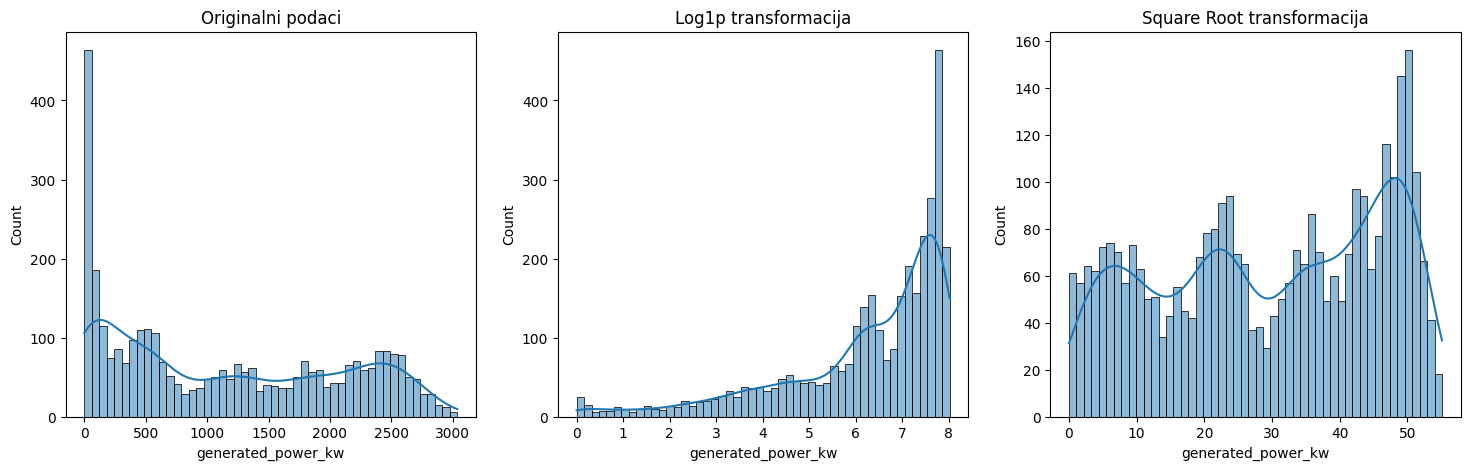

In [47]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# 1. Originalni podaci
sns.histplot(y_train, bins=50, kde=True, ax=axes[0])
axes[0].set_title("Originalni podaci")

# 2. Log transformacija
sns.histplot(np.log1p(y_train), bins=50, kde=True, ax=axes[1])
axes[1].set_title("Log1p transformacija")

# 3. Kvadratni koren
sns.histplot(np.sqrt(y_train), bins=50, kde=True, ax=axes[2])
axes[2].set_title("Square Root transformacija")

plt.show()

In [48]:
y_train_scaled = np.sqrt(y_train)
y_test_scaled = np.sqrt(y_test)

### Distribucije pre i posle transformacija

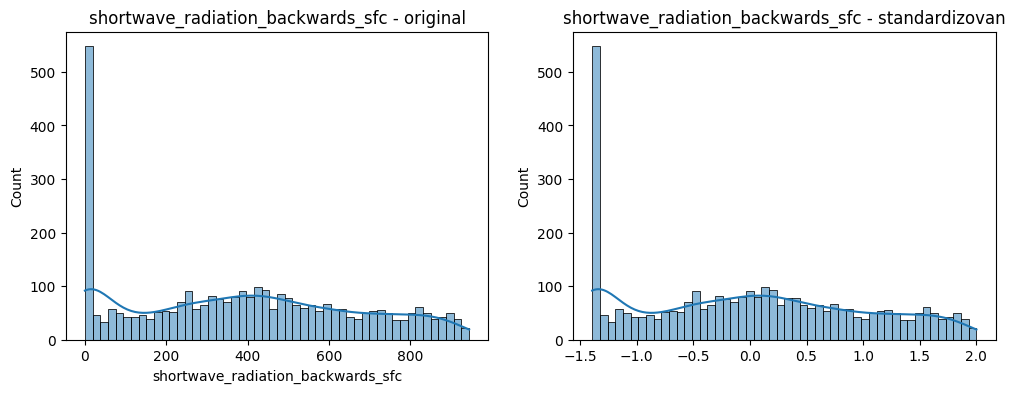

In [49]:
feature = 'shortwave_radiation_backwards_sfc'

fig, axes = plt.subplots(1, 2, figsize=(12, 4))

sns.histplot(X_train[feature], bins=50, kde=True, ax=axes[0])
axes[0].set_title(f"{feature} - original")

sns.histplot(
    StandardScaler().fit_transform(X_train[[feature]]).flatten(),
    bins=50, kde=True, ax=axes[1]
)
axes[1].set_title(f"{feature} - standardizovan")

plt.show()

Sa izbacenim kolonama postoje 14 kolona. Medjutim posle skaliranja podataka obrisane su originalne kolone 'zenith' i 'azimuth' (14-2=12) i dodate su 'zenith_sin', 'zenith_cos', 'azimuth_sin' i 'azimuth_cos' su 16 (12+4=16). Zbog toga su nove dimenzije (4213, 16), tj. 16 kolona.

In [50]:
print('Dimenzije trening skupa x:', X_train_scaled.shape)
print('Dimenzije trening skupa y:', y_train_scaled.shape)
print('Dimenzije test skupa x:', X_test_scaled.shape)
print('Dimenzije test skupa y:', y_test_scaled.shape)

Dimenzije trening skupa x: (3370, 15)
Dimenzije trening skupa y: (3370,)
Dimenzije test skupa x: (843, 15)
Dimenzije test skupa y: (843,)


### Kreiranje tabele sa rezultatima evaluacije

In [51]:
results_scal = pd.DataFrame(columns=["Model", "R2 score - training", "R2 score - test", "MAE - training", "MAE - test", "MSE - training", "MSE - test"])
results_scal

,Model,R2 score - training,R2 score - test,MAE - training,MAE - test,MSE - training,MSE - test


### Baseline model - mean prediction

In [52]:
dummy = DummyRegressor(strategy="mean")
dummy.fit(X_train_scaled, y_train_scaled)

y_train_pred = dummy.predict(X_train_scaled)
y_test_pred = dummy.predict(X_test_scaled)

metrics = evaluate(y_test_scaled, y_test_pred, y_train_scaled, y_train_pred)

R2 score - training: 0.000
R2 score - test: -0.001
Mean Absolute Error - training: 14.400
Mean Absolute Error - test: 15.062
Mean Squared Error - training: 265.249
Mean Squared Error - test: 287.455


In [53]:
results_scal=add_metrics(results_scal, "Baseline", metrics)
results_scal

,Model,R2 score - training,R2 score - test,MAE - training,MAE - test,MSE - training,MSE - test
1,Baseline,0.0,-0.00117,14.400134,15.062049,265.249025,287.455465


### Linear Regression

In [54]:
lr=LinearRegression()
lr.fit(X_train_scaled, y_train_scaled)

y_train_pred=lr.predict(X_train_scaled)
y_test_pred=lr.predict(X_test_scaled)

metrics=evaluate(y_test_scaled, y_test_pred, y_train_scaled, y_train_pred)

R2 score - training: 0.744
R2 score - test: 0.747
Mean Absolute Error - training: 6.344
Mean Absolute Error - test: 6.582
Mean Squared Error - training: 68.024
Mean Squared Error - test: 72.705


In [55]:
results_scal=add_metrics(results_scal, "Linear Regression", metrics)
results_scal

,Model,R2 score - training,R2 score - test,MAE - training,MAE - test,MSE - training,MSE - test
1,Baseline,0.000000,-0.001170,14.400134,15.062049,265.249025,287.455465
2,Linear Regression,0.743548,0.746776,6.344472,6.581737,68.023723,72.705457


### Random Forest Regression

In [56]:
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train_scaled, y_train_scaled)

y_train_pred_rf = rf.predict(X_train_scaled)
y_test_pred_rf = rf.predict(X_test_scaled)

metrics = evaluate(y_test_scaled, y_test_pred_rf, y_train_scaled, y_train_pred_rf)

R2 score - training: 0.975
R2 score - test: 0.837
Mean Absolute Error - training: 1.666
Mean Absolute Error - test: 4.458
Mean Squared Error - training: 6.520
Mean Squared Error - test: 46.854


In [57]:
results_scal=add_metrics(results_scal, "Random Forest Regression", metrics)
results_scal

,Model,R2 score - training,R2 score - test,MAE - training,MAE - test,MSE - training,MSE - test
1,Baseline,0.000000,-0.001170,14.400134,15.062049,265.249025,287.455465
2,Linear Regression,0.743548,0.746776,6.344472,6.581737,68.023723,72.705457
3,Random Forest Regression,0.975418,0.836814,1.665629,4.457864,6.520336,46.853772


### Decision Tree Regression

In [58]:
dt = DecisionTreeRegressor(random_state=42)
dt.fit(X_train_scaled, y_train_scaled)

y_train_pred_dt = dt.predict(X_train_scaled)
y_test_pred_dt = dt.predict(X_test_scaled)

metrics = evaluate(y_test_scaled, y_test_pred_dt, y_train_scaled, y_train_pred_dt)

R2 score - training: 1.000
R2 score - test: 0.683
Mean Absolute Error - training: 0.000
Mean Absolute Error - test: 6.050
Mean Squared Error - training: 0.000
Mean Squared Error - test: 91.041


In [59]:
results_scal=add_metrics(results_scal, "Decision Tree Regression", metrics)
results_scal

,Model,R2 score - training,R2 score - test,MAE - training,MAE - test,MSE - training,MSE - test
1,Baseline,0.000000,-0.001170,14.400134,15.062049,265.249025,287.455465
2,Linear Regression,0.743548,0.746776,6.344472,6.581737,68.023723,72.705457
3,Random Forest Regression,0.975418,0.836814,1.665629,4.457864,6.520336,46.853772
4,Decision Tree Regression,1.000000,0.682915,0.000000,6.049754,0.000000,91.041296


### Gradient Boosting Regression

In [60]:
gbr = GradientBoostingRegressor(n_estimators=100, random_state=42)
gbr.fit(X_train_scaled, y_train_scaled)

y_train_pred_gbr = gbr.predict(X_train_scaled)
y_test_pred_gbr = gbr.predict(X_test_scaled)

metrics = evaluate(y_test_scaled, y_test_pred_gbr, y_train_scaled, y_train_pred_gbr)

R2 score - training: 0.854
R2 score - test: 0.827
Mean Absolute Error - training: 4.415
Mean Absolute Error - test: 4.913
Mean Squared Error - training: 38.662
Mean Squared Error - test: 49.671


In [61]:
results_scal=add_metrics(results_scal, "Gradient Boosting Regression", metrics)
results_scal

,Model,R2 score - training,R2 score - test,MAE - training,MAE - test,MSE - training,MSE - test
1,Baseline,0.000000,-0.001170,14.400134,15.062049,265.249025,287.455465
2,Linear Regression,0.743548,0.746776,6.344472,6.581737,68.023723,72.705457
3,Random Forest Regression,0.975418,0.836814,1.665629,4.457864,6.520336,46.853772
4,Decision Tree Regression,1.000000,0.682915,0.000000,6.049754,0.000000,91.041296
5,Gradient Boosting Regression,0.854244,0.827001,4.415109,4.913234,38.661728,49.671337


### K-Nearest Neighbors (KNN) Regression

In [62]:
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train_scaled, y_train_scaled)

y_train_pred_knn = knn.predict(X_train_scaled)
y_test_pred_knn = knn.predict(X_test_scaled)

metrics = evaluate(y_test_scaled, y_test_pred_knn, y_train_scaled, y_train_pred_knn)

R2 score - training: 0.852
R2 score - test: 0.777
Mean Absolute Error - training: 4.481
Mean Absolute Error - test: 5.758
Mean Squared Error - training: 39.259
Mean Squared Error - test: 64.104


In [63]:
results_scal=add_metrics(results_scal, "KNN Regression", metrics)
results_scal

,Model,R2 score - training,R2 score - test,MAE - training,MAE - test,MSE - training,MSE - test
1,Baseline,0.000000,-0.001170,14.400134,15.062049,265.249025,287.455465
2,Linear Regression,0.743548,0.746776,6.344472,6.581737,68.023723,72.705457
3,Random Forest Regression,0.975418,0.836814,1.665629,4.457864,6.520336,46.853772
4,Decision Tree Regression,1.000000,0.682915,0.000000,6.049754,0.000000,91.041296
5,Gradient Boosting Regression,0.854244,0.827001,4.415109,4.913234,38.661728,49.671337
6,KNN Regression,0.851993,0.776735,4.480617,5.757941,39.258614,64.103780


### Support Vector Regression (SVR)

In [64]:
svr = SVR(kernel='rbf')
svr.fit(X_train_scaled, y_train_scaled)

y_train_pred_svr = svr.predict(X_train_scaled)
y_test_pred_svr = svr.predict(X_test_scaled)

metrics = evaluate(y_test_scaled, y_test_pred_svr, y_train_scaled, y_train_pred_svr)

R2 score - training: 0.769
R2 score - test: 0.768
Mean Absolute Error - training: 5.514
Mean Absolute Error - test: 5.751
Mean Squared Error - training: 61.230
Mean Squared Error - test: 66.622


In [65]:
results_scal=add_metrics(results_scal, "SVR Regression", metrics)
results_scal

,Model,R2 score - training,R2 score - test,MAE - training,MAE - test,MSE - training,MSE - test
1,Baseline,0.000000,-0.001170,14.400134,15.062049,265.249025,287.455465
2,Linear Regression,0.743548,0.746776,6.344472,6.581737,68.023723,72.705457
3,Random Forest Regression,0.975418,0.836814,1.665629,4.457864,6.520336,46.853772
4,Decision Tree Regression,1.000000,0.682915,0.000000,6.049754,0.000000,91.041296
5,Gradient Boosting Regression,0.854244,0.827001,4.415109,4.913234,38.661728,49.671337
6,KNN Regression,0.851993,0.776735,4.480617,5.757941,39.258614,64.103780
7,SVR Regression,0.769159,0.767964,5.513599,5.750554,61.230283,66.622151


### Ridge Regression

In [66]:
ridge = Ridge(alpha=1.0)
ridge.fit(X_train_scaled, y_train_scaled)

y_train_pred_ridge = ridge.predict(X_train_scaled)
y_test_pred_ridge = ridge.predict(X_test_scaled)

metrics_ridge = evaluate(y_test_scaled, y_test_pred_ridge, y_train_scaled, y_train_pred_ridge)

R2 score - training: 0.743
R2 score - test: 0.746
Mean Absolute Error - training: 6.369
Mean Absolute Error - test: 6.592
Mean Squared Error - training: 68.163
Mean Squared Error - test: 72.880


In [67]:
results_scal = add_metrics(results_scal, "Ridge Regression", metrics_ridge)
results_scal

,Model,R2 score - training,R2 score - test,MAE - training,MAE - test,MSE - training,MSE - test
1,Baseline,0.000000,-0.001170,14.400134,15.062049,265.249025,287.455465
2,Linear Regression,0.743548,0.746776,6.344472,6.581737,68.023723,72.705457
3,Random Forest Regression,0.975418,0.836814,1.665629,4.457864,6.520336,46.853772
4,Decision Tree Regression,1.000000,0.682915,0.000000,6.049754,0.000000,91.041296
5,Gradient Boosting Regression,0.854244,0.827001,4.415109,4.913234,38.661728,49.671337
6,KNN Regression,0.851993,0.776735,4.480617,5.757941,39.258614,64.103780
7,SVR Regression,0.769159,0.767964,5.513599,5.750554,61.230283,66.622151
8,Ridge Regression,0.743022,0.746167,6.369090,6.591725,68.163140,72.880354


### Lasso Regression

In [68]:
lasso = Lasso(alpha=0.1)
lasso.fit(X_train_scaled, y_train_scaled)

y_train_pred_lasso = lasso.predict(X_train_scaled)
y_test_pred_lasso = lasso.predict(X_test_scaled)

metrics_lasso = evaluate(y_test_scaled, y_test_pred_lasso, y_train_scaled, y_train_pred_lasso)

R2 score - training: 0.731
R2 score - test: 0.740
Mean Absolute Error - training: 6.655
Mean Absolute Error - test: 6.799
Mean Squared Error - training: 71.420
Mean Squared Error - test: 74.644


In [69]:
results_scal = add_metrics(results_scal, "Lasso Regression", metrics_lasso)
results_scal

,Model,R2 score - training,R2 score - test,MAE - training,MAE - test,MSE - training,MSE - test
1,Baseline,0.000000,-0.001170,14.400134,15.062049,265.249025,287.455465
2,Linear Regression,0.743548,0.746776,6.344472,6.581737,68.023723,72.705457
3,Random Forest Regression,0.975418,0.836814,1.665629,4.457864,6.520336,46.853772
4,Decision Tree Regression,1.000000,0.682915,0.000000,6.049754,0.000000,91.041296
5,Gradient Boosting Regression,0.854244,0.827001,4.415109,4.913234,38.661728,49.671337
6,KNN Regression,0.851993,0.776735,4.480617,5.757941,39.258614,64.103780
7,SVR Regression,0.769159,0.767964,5.513599,5.750554,61.230283,66.622151
8,Ridge Regression,0.743022,0.746167,6.369090,6.591725,68.163140,72.880354
9,Lasso Regression,0.730743,0.740025,6.654963,6.798536,71.420266,74.643866


# Optimizacija hiperparametara

### Kreiranje tabele sa rezultatima evaluacije

In [70]:
results_opt = pd.DataFrame(columns=["Model", "R2 score - training", "R2 score - test", "MAE - training", "MAE - test", "MSE - training", "MSE - test"])
results_opt

,Model,R2 score - training,R2 score - test,MAE - training,MAE - test,MSE - training,MSE - test


### Random Forest Regression

In [71]:
param_grid_rf = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10],
    'max_features': ['sqrt', 'log2']
}

grid_rf = GridSearchCV(RandomForestRegressor(random_state=42), param_grid_rf, cv=3, scoring='r2', n_jobs=-1)
grid_rf.fit(X_train_scaled, y_train_scaled)

best_rf = grid_rf.best_estimator_

y_train_pred_rf = best_rf.predict(X_train_scaled)
y_test_pred_rf = best_rf.predict(X_test_scaled)

metrics_rf_opt = evaluate(y_test_scaled, y_test_pred_rf, y_train_scaled, y_train_pred_rf)
results_opt = add_metrics(results_opt, "Random Forest Regression", metrics_rf_opt)

print(f"Najbolji parametri za Random Forest Regression: {grid_rf.best_params_}")

results_opt

R2 score - training: 0.976
R2 score - test: 0.839
Mean Absolute Error - training: 1.731
Mean Absolute Error - test: 4.702
Mean Squared Error - training: 6.441
Mean Squared Error - test: 46.085
Najbolji parametri za Random Forest Regression: {'max_depth': 20, 'max_features': 'sqrt', 'min_samples_split': 2, 'n_estimators': 200}


,Model,R2 score - training,R2 score - test,MAE - training,MAE - test,MSE - training,MSE - test
1,Random Forest Regression,0.975717,0.839493,1.730552,4.701688,6.441055,46.08473


### Gradient Boosting Regression

In [72]:
param_grid_gb = {
    'n_estimators': [100, 300],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 5],
    'subsample': [0.8, 1.0]
}
grid_gb = GridSearchCV(GradientBoostingRegressor(random_state=42), param_grid_gb, cv=5, scoring='r2', n_jobs=-1)
grid_gb.fit(X_train_scaled, y_train_scaled)

best_gb = grid_gb.best_estimator_
metrics_gb_opt = evaluate(y_test_scaled, best_gb.predict(X_test_scaled), y_train_scaled, best_gb.predict(X_train_scaled))
results_opt = add_metrics(results_opt, "Gradient Boosting Regression", metrics_gb_opt)

print(f"Najbolji parametri za GBR: {grid_gb.best_params_}")

results_opt

R2 score - training: 0.953
R2 score - test: 0.844
Mean Absolute Error - training: 2.540
Mean Absolute Error - test: 4.500
Mean Squared Error - training: 12.544
Mean Squared Error - test: 44.715
Najbolji parametri za GBR: {'learning_rate': 0.05, 'max_depth': 5, 'n_estimators': 300, 'subsample': 0.8}


,Model,R2 score - training,R2 score - test,MAE - training,MAE - test,MSE - training,MSE - test
1,Random Forest Regression,0.975717,0.839493,1.730552,4.701688,6.441055,46.084730
2,Gradient Boosting Regression,0.952707,0.844264,2.540437,4.500116,12.544377,44.714745


### KNN Regression

In [73]:
param_grid_knn = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
    'p': [1, 2] # 1 - Manhattan distance, 2 - Euclidean
}
grid_knn = GridSearchCV(KNeighborsRegressor(), param_grid_knn, cv=5, scoring='r2', n_jobs=-1)
grid_knn.fit(X_train_scaled, y_train_scaled)

best_knn = grid_knn.best_estimator_
metrics_knn_opt = evaluate(y_test_scaled, best_knn.predict(X_test_scaled), y_train_scaled, best_knn.predict(X_train_scaled))
results_opt = add_metrics(results_opt, "KNN Regression", metrics_knn_opt)

print(f"Najbolji parametri za KNN Regression: {grid_knn.best_params_}")

results_opt

R2 score - training: 1.000
R2 score - test: 0.808
Mean Absolute Error - training: 0.000
Mean Absolute Error - test: 5.256
Mean Squared Error - training: 0.000
Mean Squared Error - test: 55.059
Najbolji parametri za KNN Regression: {'n_neighbors': 9, 'p': 1, 'weights': 'distance'}


,Model,R2 score - training,R2 score - test,MAE - training,MAE - test,MSE - training,MSE - test
1,Random Forest Regression,0.975717,0.839493,1.730552,4.701688,6.441055,46.084730
2,Gradient Boosting Regression,0.952707,0.844264,2.540437,4.500116,12.544377,44.714745
3,KNN Regression,1.000000,0.808238,0.000000,5.255866,0.000000,55.058726


### SVR Regression

In [74]:
param_grid_svr = {
    'C': [0.1, 1, 10, 100],
    'epsilon': [0.01, 0.1, 0.2],
    'kernel': ['rbf']
}
grid_svr = GridSearchCV(SVR(), param_grid_svr, cv=3, scoring='r2', n_jobs=-1)
grid_svr.fit(X_train_scaled, y_train_scaled)

best_svr = grid_svr.best_estimator_
metrics_svr_opt = evaluate(y_test_scaled, best_svr.predict(X_test_scaled), y_train_scaled, best_svr.predict(X_train_scaled))
results_opt = add_metrics(results_opt, "SVR Regression", metrics_svr_opt)

print(f"Najbolji parametri za SVR Regression: {grid_svr.best_params_}")

results_opt

R2 score - training: 0.878
R2 score - test: 0.813
Mean Absolute Error - training: 3.232
Mean Absolute Error - test: 4.591
Mean Squared Error - training: 32.411
Mean Squared Error - test: 53.700
Najbolji parametri za SVR Regression: {'C': 100, 'epsilon': 0.2, 'kernel': 'rbf'}


,Model,R2 score - training,R2 score - test,MAE - training,MAE - test,MSE - training,MSE - test
1,Random Forest Regression,0.975717,0.839493,1.730552,4.701688,6.441055,46.084730
2,Gradient Boosting Regression,0.952707,0.844264,2.540437,4.500116,12.544377,44.714745
3,KNN Regression,1.000000,0.808238,0.000000,5.255866,0.000000,55.058726
4,SVR Regression,0.877811,0.812971,3.231942,4.591500,32.410523,53.699555


### Ridge Regression

In [75]:
param_grid_ridge = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}
grid_ridge = GridSearchCV(Ridge(), param_grid_ridge, cv=5, scoring='r2', n_jobs=-1)
grid_ridge.fit(X_train_scaled, y_train_scaled)

best_ridge = grid_ridge.best_estimator_
metrics_ridge_opt = evaluate(y_test_scaled, best_ridge.predict(X_test_scaled), y_train_scaled, best_ridge.predict(X_train_scaled))
results_opt = add_metrics(results_opt, "Ridge Regression", metrics_ridge_opt)

print(f"Najbolji parametri za Ridge Regression: {grid_ridge.best_params_}")

results_opt

R2 score - training: 0.744
R2 score - test: 0.747
Mean Absolute Error - training: 6.345
Mean Absolute Error - test: 6.582
Mean Squared Error - training: 68.024
Mean Squared Error - test: 72.706
Najbolji parametri za Ridge Regression: {'alpha': 0.01}


,Model,R2 score - training,R2 score - test,MAE - training,MAE - test,MSE - training,MSE - test
1,Random Forest Regression,0.975717,0.839493,1.730552,4.701688,6.441055,46.084730
2,Gradient Boosting Regression,0.952707,0.844264,2.540437,4.500116,12.544377,44.714745
3,KNN Regression,1.000000,0.808238,0.000000,5.255866,0.000000,55.058726
4,SVR Regression,0.877811,0.812971,3.231942,4.591500,32.410523,53.699555
5,Ridge Regression,0.743548,0.746774,6.344697,6.581756,68.023745,72.706083


### Lasso Regression

In [76]:
param_grid_lasso = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100]}

grid_lasso = GridSearchCV(Lasso(), param_grid_lasso, cv=5, scoring='r2', n_jobs=-1)
grid_lasso.fit(X_train_scaled, y_train_scaled)

best_lasso = grid_lasso.best_estimator_

y_train_pred_lasso = best_lasso.predict(X_train_scaled)
y_test_pred_lasso = best_lasso.predict(X_test_scaled)

metrics_lasso_opt = evaluate(y_test_scaled, y_test_pred_lasso, y_train_scaled, y_train_pred_lasso)
results_opt = add_metrics(results_opt, "Lasso Regression", metrics_lasso_opt)

print(f"Najbolji parametri za Lasso Regression: {grid_lasso.best_params_}")

results_opt

R2 score - training: 0.744
R2 score - test: 0.747
Mean Absolute Error - training: 6.347
Mean Absolute Error - test: 6.582
Mean Squared Error - training: 68.027
Mean Squared Error - test: 72.719
Najbolji parametri za Lasso Regression: {'alpha': 0.001}


,Model,R2 score - training,R2 score - test,MAE - training,MAE - test,MSE - training,MSE - test
1,Random Forest Regression,0.975717,0.839493,1.730552,4.701688,6.441055,46.084730
2,Gradient Boosting Regression,0.952707,0.844264,2.540437,4.500116,12.544377,44.714745
3,KNN Regression,1.000000,0.808238,0.000000,5.255866,0.000000,55.058726
4,SVR Regression,0.877811,0.812971,3.231942,4.591500,32.410523,53.699555
5,Ridge Regression,0.743548,0.746774,6.344697,6.581756,68.023745,72.706083
6,Lasso Regression,0.743535,0.746728,6.346802,6.581716,68.027137,72.719233


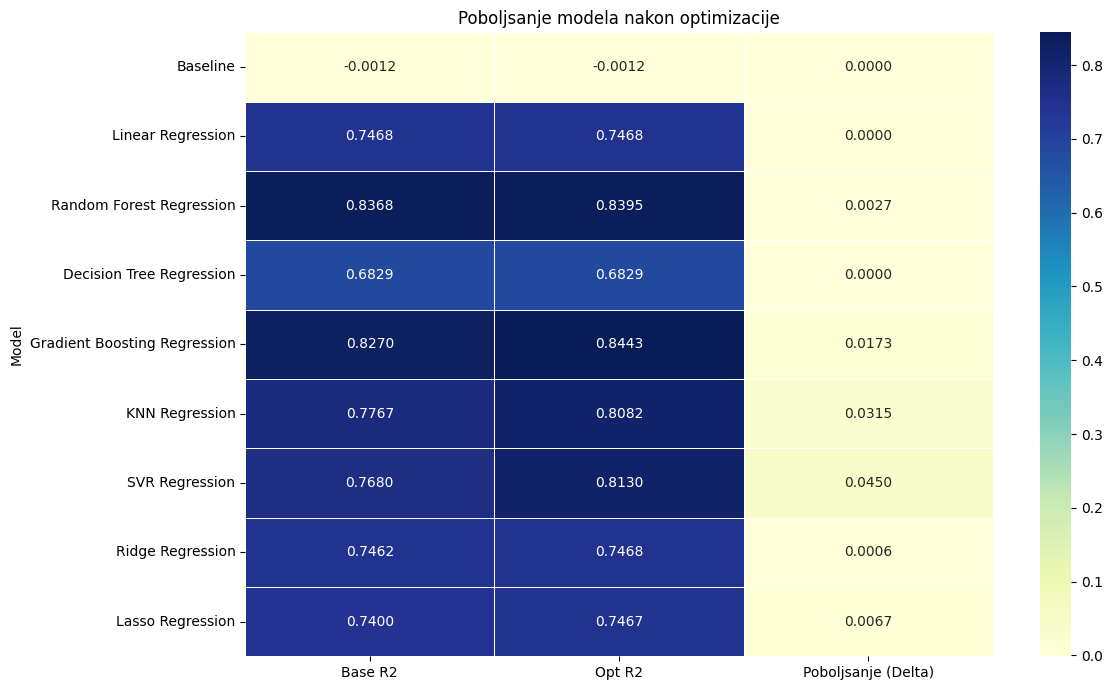

In [77]:
df_final = results_scal[['Model', 'R2 score - test']].copy()
df_final.rename(columns={'R2 score - test': 'Base R2'}, inplace=True)

df_opt_subset = results_opt[['Model', 'R2 score - test']].copy()
df_opt_subset.rename(columns={'R2 score - test': 'Opt R2'}, inplace=True)

df_comp = pd.merge(df_final, df_opt_subset, on='Model', how='left')

df_comp['Opt R2'] = df_comp['Opt R2'].fillna(df_comp['Base R2'])

df_comp['Poboljsanje (Delta)'] = df_comp['Opt R2'] - df_comp['Base R2']

df_comp.set_index('Model', inplace=True)

plt.figure(figsize=(12, 7))
sns.heatmap(df_comp[['Base R2', 'Opt R2', 'Poboljsanje (Delta)']], 
            annot=True, 
            fmt=".4f", 
            cmap="YlGnBu", 
            linewidths=.5)

plt.title("Poboljsanje modela nakon optimizacije")
plt.tight_layout()
plt.show()

# Interpretabilnost modela

## Feature importance

In [78]:
importances = best_rf.feature_importances_

fi_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

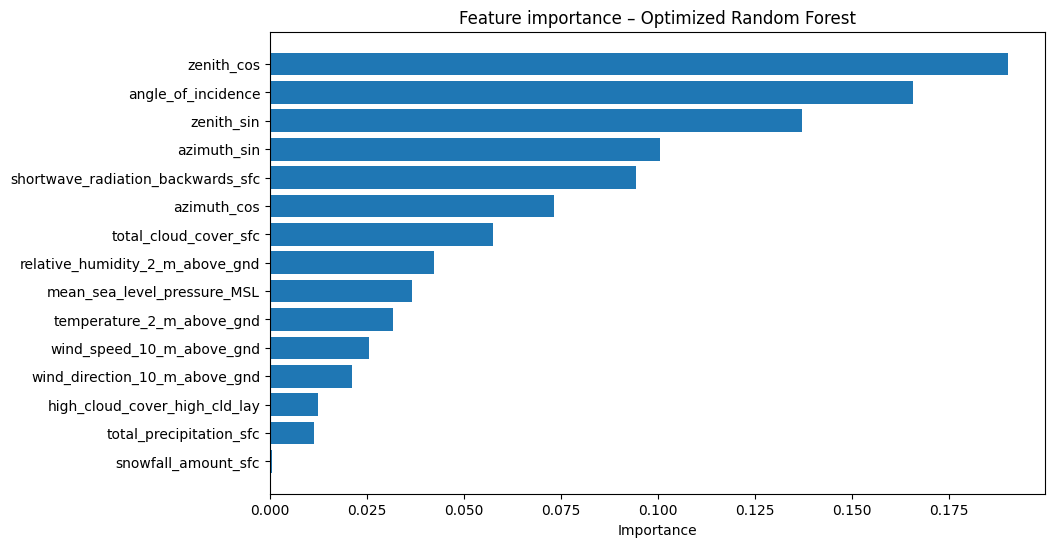

In [79]:
plt.figure(figsize=(10, 6))
plt.barh(fi_df['Feature'], fi_df['Importance'])
plt.gca().invert_yaxis()
plt.title('Feature importance – Optimized Random Forest')
plt.xlabel('Importance')
plt.show()

## SHAP

In [80]:
explainer = shap.Explainer(best_rf, X_train)
shap_values = explainer(X_test)

 96%|=================== | 811/843 [00:19<00:00]       

### Globalna interpretacija

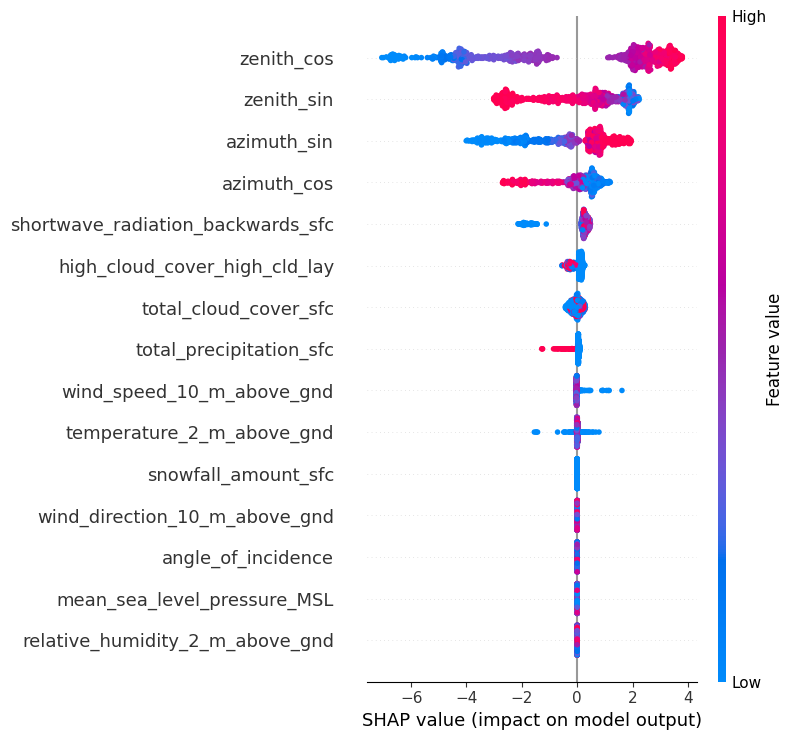

In [81]:
shap.summary_plot(shap_values, X_test)

### Lokalna interpretacija

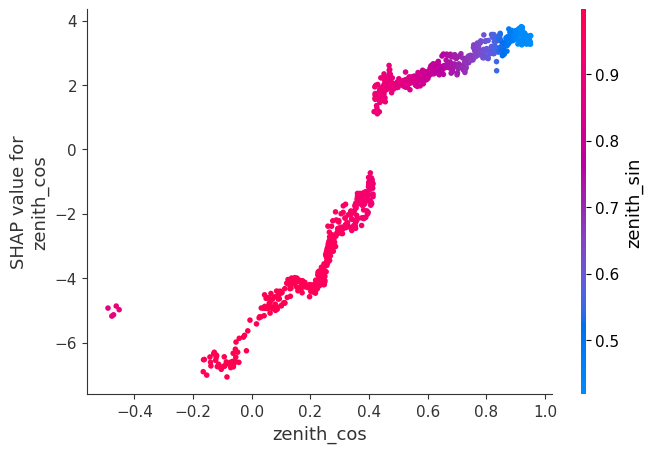

In [82]:
shap.dependence_plot(
    fi_df.iloc[0]['Feature'],
    shap_values.values,
    X_test
)

## LIME

# Redukcija dimenzionalnosti

# Feature selection